In [1]:
%run lm_ode.ipynb

In [2]:
import matplotlib.pyplot as plt

# Model 2: Pyrolytic dehydrogenation model
Pyrolytic dehydrogenation of benzene to diphenyl and triphenyl
$$2C_2H_6\longleftrightarrow C_{12}H_{10}+H_2$$
$$C_6H_6+C_{12}H_{10}\longleftrightarrow C_{10}H_{14}+H_2$$
with differential equations model
\begin{align*}
\frac{dy_1}{dt}=&-r_1-r_2;\hspace{10mm}y_1(0)=1\\
\frac{dy_2}{dt}=&\frac{r_1}{2}-r_2;\hspace{10mm}y_2(0)=0\\
r_1=&k_1\left(y_1^2-y_2\frac{2-2y_1-y_2}{3K_1}\right)\\
r_2=&k_2\left(y_1y_2-\frac{(1-y_1-2y_2)(2-2y_1-y_2)}{9K_2}\right)
\end{align*}
with $K_1=0.242$ and $K_2=0.428$

## Scaling for parameter estimation
Let $u_1=\frac{y_1}{M_1}$ and $u_2=\frac{y_2}{M_2}$,
\begin{align*}
\frac{M_1}{t_c}\frac{du_1}{d\bar{t}}=&-k_1\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&-k_1M_1^2\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_1}{d\bar{t}}=&-k_1M_1t_c\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

\begin{align*}
\frac{M_2}{t_c}\frac{du_2}{d\bar{t}}=&\frac{k_1}{2}\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&\frac{k_1M_1^2}{2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_2}{d\bar{t}}=&\frac{k_1M_1t_c}{2}\frac{M_1}{M_2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\frac{M_1}{M_2}\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

Let $\bar{k_1}=k_1M_1t_c$, $\bar{k_2}=k_2M_1t_c$ and $\frac{M_2}{M_1}=\gamma$,
\begin{align*}
\frac{du_1}{d\bar{t}}=&-\bar{k}_1\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\bar{k}_2\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}
\begin{align*}
\frac{du_2}{d\bar{t}}=&\frac{\bar{k}_1}{2\gamma}\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\frac{\bar{k}_2}{\gamma}\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}

In [3]:
def model2_scaled(u,kbar,M1,M2):
    K1 = 0.242
    K2 = 0.428
    gamma = M2/M1
    r1 = u[0]**2-gamma*u[1]*(2/M1-2*u[0]-gamma*u[1])/(3*K1)
    r2 = gamma*u[0]*u[1]-(1/M1-u[0]-2*gamma*u[1])*(2/M1-2*u[0]-gamma*u[1])/(9*K2)
    dudt = np.empty(2)
    dudt[0] = -kbar[0]*r1-kbar[1]*r2
    dudt[1] = kbar[0]*r1/(2*gamma)-kbar[1]*r2/gamma
    return dudt

## Integration with estimated paramters

In [4]:
t = np.array([0,5.63,11.32,16.97,22.62,34.00,39.70,45.20,169.7],dtype='f')*1e-4
yhat = np.array([[1,0.828,0.704,0.622,0.565,0.499,0.482,0.470,0.443],
                   [0,0.0737,0.1130,0.1322,0.1400,0.1468,0.1477,0.1477,0.1476]],dtype='f')
y0 = yhat[:,0]
k = np.array([354.61,400.23])

In [5]:
tc = t[-1]
M1 = max(yhat[0,:])
M2 = max(yhat[1,:])
tbar = t/tc
uhat = np.diag([1/M1,1/M2])@yhat
u0 = uhat[:,0]
kbar = k*M1*tc

In [6]:
def model2(u,kbar):
    return model2_scaled(u,kbar,M1,M2)

In [7]:
res = integrator_jacobian(model2,u0,kbar,tbar)

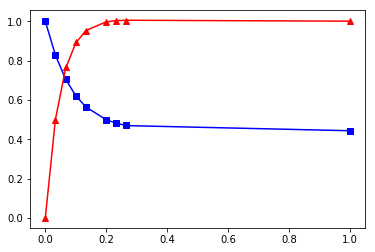

In [8]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

## Parameter estimation with LM mothod
### Test with given parameters

In [9]:
Q = np.eye(2)
k_est = lm(model2,uhat,Q,kbar,tbar,[1e-3,1e-4,1e-4,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         1|          1.0880e-04|          1.86e-05| 3.7e-04| 1.2e+00


In [10]:
k_est

[array([6.06060304, 6.90925622]),
 array([[1.        , 0.82723439, 0.70381611, 0.61978866, 0.56277274,
         0.49787775, 0.48020942, 0.46864165, 0.44329833],
        [0.        , 0.50159618, 0.76085668, 0.88887367, 0.95143837,
         0.9953009 , 1.00129306, 1.00345299, 1.00025579]]),
 [1, 'g']]

### Initial guess with $k=[500,500]$

In [11]:
k0 = np.array([500,500])
kbar0 = k0*M1*tc
est = lm(model2,uhat,Q,kbar0,tbar,[1e-3,1e-4,1e-4,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         1|          8.3497e-03|          9.34e-02| 2.9e-04| 1.6e+00
         2|          1.1069e-04|          1.04e-03| 9.5e-05| 2.0e+00
         3|          1.0882e-04|          6.30e-06| 3.2e-05| 1.9e+00


In [12]:
est

[array([6.06104816, 6.91088138]),
 array([[1.        , 0.82722262, 0.70379873, 0.61977012, 0.56275538,
         0.49786806, 0.48019915, 0.46863329, 0.44329832],
        [0.        , 0.50161358, 0.76085978, 0.88885947, 0.95141288,
         0.99526795, 1.0012687 , 1.00343103, 1.00025573]]),
 [3, 'g']]

### Initial guess with $k=[10000,10000]$

In [13]:
k0 = np.array([1e4,1e4])
kbar0 = k0*M1*tc
est = lm(model2,uhat,Q,kbar0,tbar,[1e-1,1e-8,1e-8,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         1|          2.6690e-01|          1.92e-01| 7.7e-08| 5.5e+01
         2|          3.3004e-01|          1.92e-01| 1.5e-07|-1.4e+01
         3|          3.2635e-01|          1.92e-01| 6.1e-07|-8.0e+00
         4|          3.0928e-01|          1.92e-01| 4.9e-06|-1.7e+00
         5|          2.7094e-01|          1.92e-01| 7.9e-05|-3.5e-02
         6|          2.5345e-01|          1.92e-01| 1.5e-04| 1.0e-02
         7|          6.3141e-01|          1.92e-01| 3.1e-04|-2.6e-01
         8|          2.7404e-01|          1.92e-01| 1.2e-03|-1.2e-02
         9|          2.0085e-01|          2.00e-01| 2.4e-03| 1.0e-02
        10|          8.3272e-01|          2.00e-01| 4.7e-03|-1.6e-01
        11|          2.9950e-01|          2.00e-01| 1.9e-02|-1.7e-02
        12|          2.1627e-01|          2.00e-01| 1.5e-01|-2.6e-03
        13|          8.3732e-02|          1.35e-02| 2.8e-01| 2.7e-02
        14|          8.2584e-02|    

In [14]:
est

[array([11.18026766, 51.39445697]),
 array([[1.        , 0.69563324, 0.55626383, 0.4971802 , 0.46974197,
         0.44978553, 0.44652634, 0.44494231, 0.44329309],
        [0.        , 0.4943102 , 0.6847752 , 0.8258344 , 0.90912497,
         0.97692182, 0.98855457, 0.99426298, 1.00024364]]),
 [31, 'h']]

In [15]:
kest = est[0]
est = lm(model2,uhat,Q,kest,tbar,[1e-1,1e-8,1e-8,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         1|          7.7322e-02|          1.23e-02| 1.2e-01| 2.2e-03
         2|          7.4684e-02|          1.34e-02| 2.4e-01| 2.8e-03
         3|          7.3129e-02|          1.40e-02| 4.8e-01| 3.0e-03
         4|          7.2265e-02|          1.44e-02| 9.5e-01| 3.2e-03
         5|          7.1803e-02|          1.46e-02| 1.9e+00| 3.3e-03
         6|          7.1565e-02|          1.47e-02| 3.7e+00| 3.3e-03
         7|          7.1445e-02|          1.47e-02| 7.4e+00| 3.3e-03
         8|          7.1379e-02|          1.48e-02| 1.5e+01| 3.5e-03
         9|          7.1348e-02|          1.48e-02| 2.9e+01| 3.3e-03
        10|          7.1331e-02|          1.48e-02| 5.7e+01| 3.4e-03
        11|          7.1323e-02|          1.48e-02| 1.1e+02| 3.3e-03
        12|          7.1320e-02|          1.48e-02| 2.2e+02| 3.0e-03
        13|          7.1317e-02|          1.48e-02| 4.4e+02| 4.4e-03
        14|          7.1316e-02|    

In [16]:
est

[array([10.35356674, 35.43041039]),
 array([[1.        , 0.71716587, 0.57238126, 0.50678026, 0.47555629,
         0.45194873, 0.44781374, 0.44571309, 0.44329309],
        [0.        , 0.53086762, 0.69434241, 0.81363325, 0.89424871,
         0.96933794, 0.98387523, 0.99141961, 1.00024363]]),
 [22, 'h']]

In [17]:
kest = est[0]
res = integrator_jacobian(model2,u0,kest,tbar)

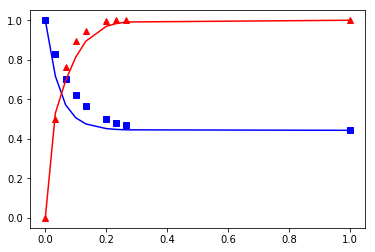

In [18]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

In [19]:
a = np.array([1,2])
a = a/2
print(a)

[0.5 1. ]
